# Exploratory Data Analysis

## Important links

- [Exploratory Data Analysis](https://www.youtube.com/playlist?list=PLupD_xFct8mFDeCqoUAWZpUddeqmT28_L) (Highly recommended to understand the Plots and their meanings)
- [Many analyst, one dataset](https://www.youtube.com/watch?v=W5WE9Db2RLU)
- [Kaggle](https://www.kaggle.com) (Highly recommended to practice any ML skill. Just search for skill tags you are looking for and practice)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [4]:
# printing unique values for month, week and weekDay columns
flights['WEEKDAY'].unique() 

array([4, 5, 6, 7, 1, 2, 3], dtype=int64)

In [5]:
# storing numbers of cancelled and diverted flights
cancelled = flights['CANCELLED'].sum()
diverted = flights['DIVERTED'].sum()

In [6]:
# creating a delayed column and storing number of delayed flights
flights['DELAYED'] = (flights['ARR_DELAY'] > 10).astype('int')
delayed = flights['DELAYED'].sum()

In [7]:
# creating a on_time column and storing number of on_time flights
flights['on_time'] = 1 - flights[['DELAYED', 'CANCELLED','DIVERTED']].any(axis=1)
on_time = flights['on_time'].sum()

In [8]:
# converting all the column names to lowercase
flights.columns = flights.columns.str.lower()

In [14]:
# putting cancelled, diverted, delayed and on_time variable in the form of a series.
status = pd.Series([cancelled, diverted, delayed, on_time], index= ["cancelled", "diverted", "delayed", "on_time"])
status

cancelled      881
diverted       137
delayed      13689
on_time      43785
dtype: int64

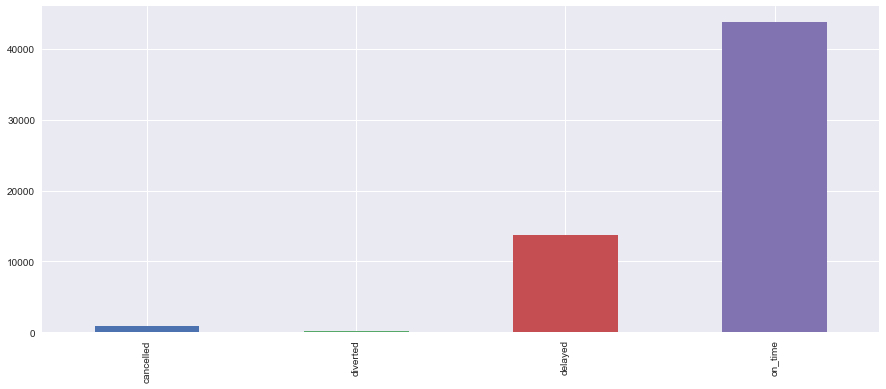

In [13]:
plt.figure(figsize=(15,6))
status.plot.bar()

___
## calculating flights delayed

In [52]:
# total delayed flights for "WN" airline
flights.loc[flights['airline'] == 'WN', 'delayed'].sum()

2205

In [53]:
flights['airline'].unique()

array(['WN', 'UA', 'MQ', 'AA', 'F9', 'EV', 'OO', 'NK', 'US', 'AS', 'DL',
       'VX', 'B6', 'HA'], dtype=object)

In [54]:
airline_delay = {}

for i in flights['airline'].unique():
     airline_delay[i] = flights.loc[flights['airline'] == i, 'delayed'].sum()   

airline_delay

{'AA': 2037,
 'AS': 105,
 'B6': 163,
 'DL': 1789,
 'EV': 1367,
 'F9': 408,
 'HA': 31,
 'MQ': 888,
 'NK': 555,
 'OO': 1618,
 'UA': 1973,
 'US': 335,
 'VX': 215,
 'WN': 2205}

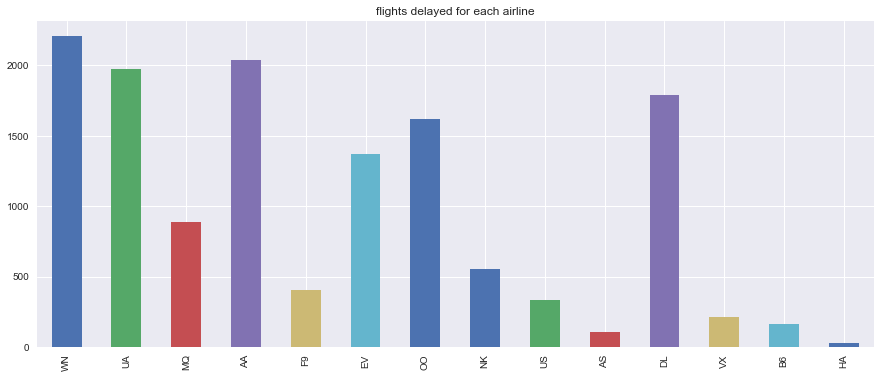

In [57]:
plt.figure(figsize=(15,6))
plt.title('flights delayed for each airline')
pd.Series(airline_delay).plot.bar()

____
## Plotting

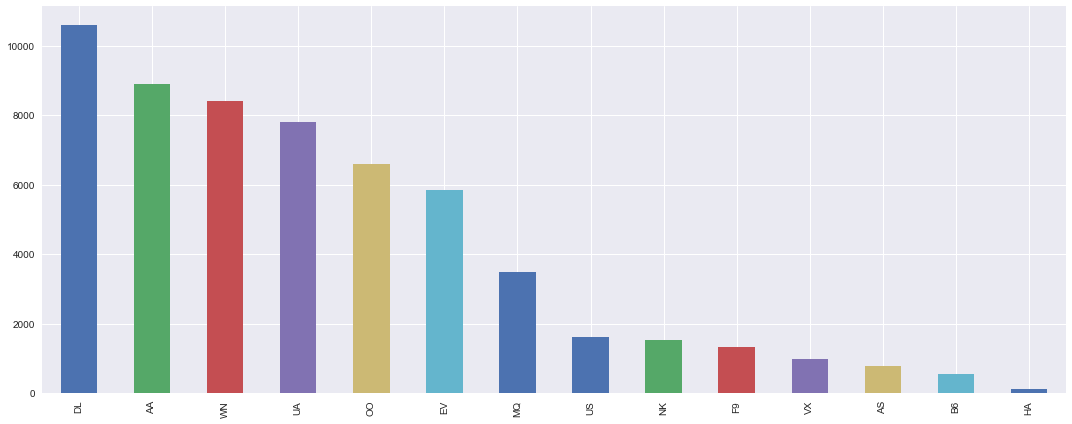

In [16]:
plt.figure(figsize=(15,6))
flights['airline'].value_counts().plot.bar()
plt.tight_layout()

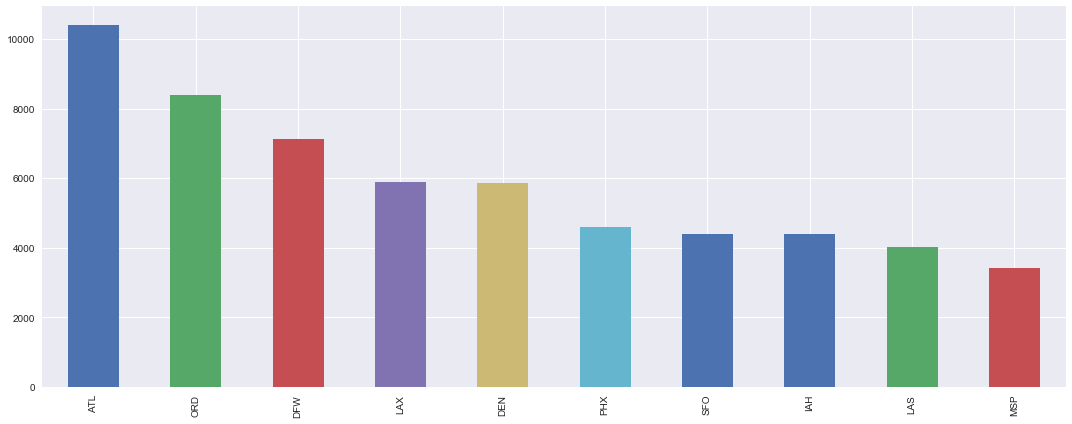

In [17]:
plt.figure(figsize=(15,6))
flights['org_air'].value_counts().plot.bar()
plt.tight_layout()

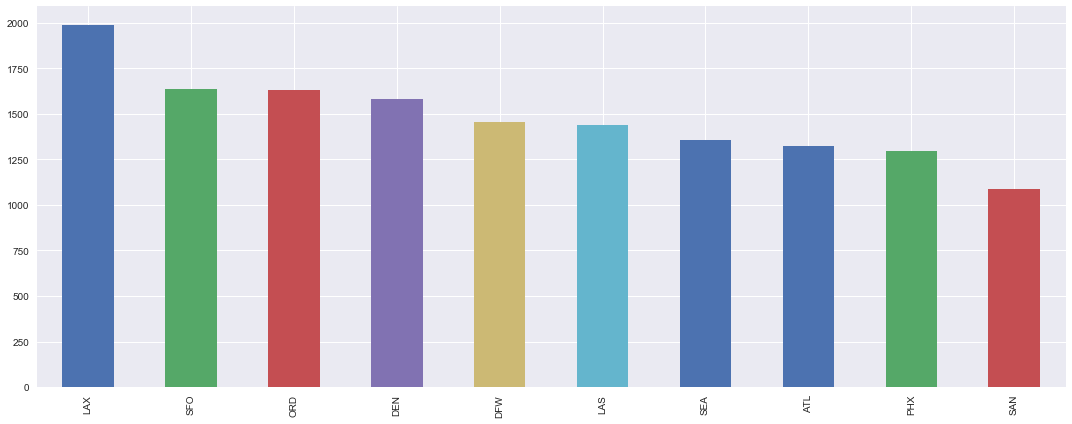

In [19]:
plt.figure(figsize=(15,6))
flights['dest_air'].value_counts().head(10).plot.bar()
plt.tight_layout()

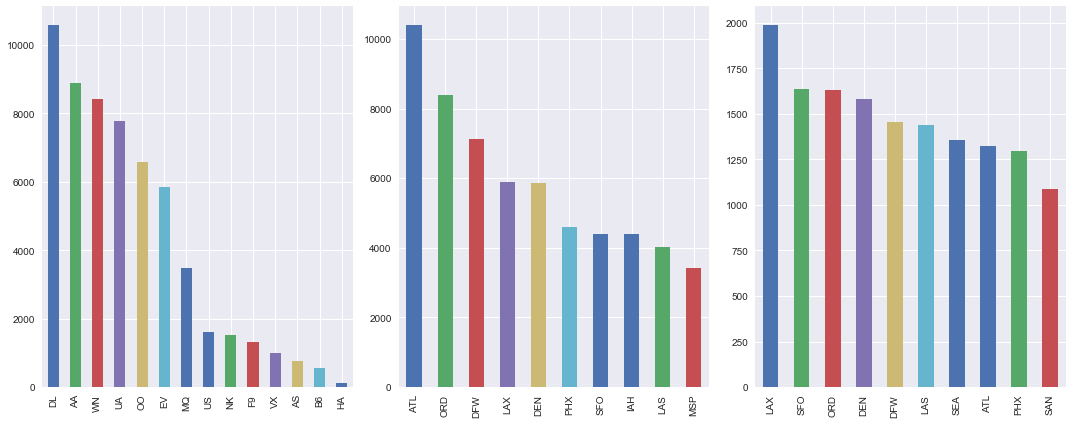

In [21]:
# Plotting all the above plot together
fig, axes = plt.subplots(1,3, figsize=(15,6))
flights['airline'].value_counts().plot.bar(ax=axes[0])
flights['org_air'].value_counts().plot.bar(ax=axes[1])
flights['dest_air'].value_counts().head(10).plot.bar(ax=axes[2])
plt.tight_layout()

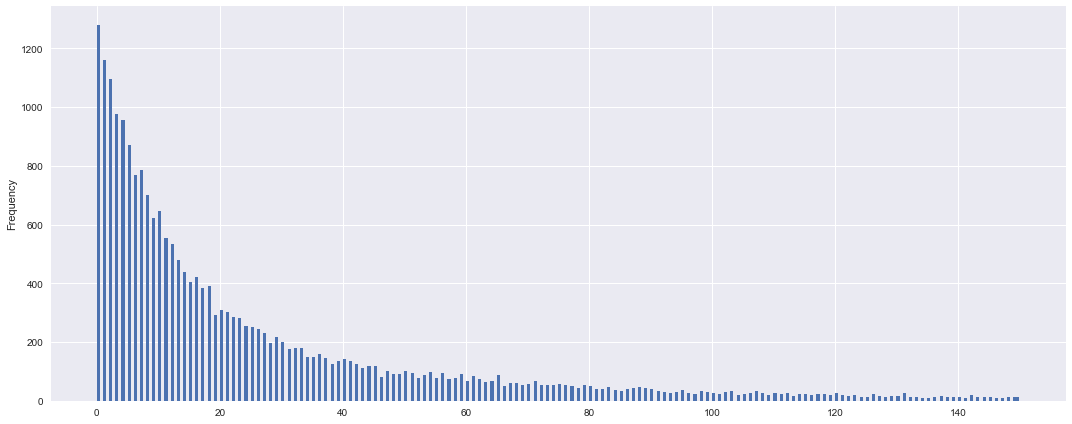

In [22]:
# plotting histogram for arrival_delay
plt.figure(figsize=(15,6))
flights['arr_delay'].plot(kind='hist', range=(0,150), bins= 300)
plt.tight_layout()

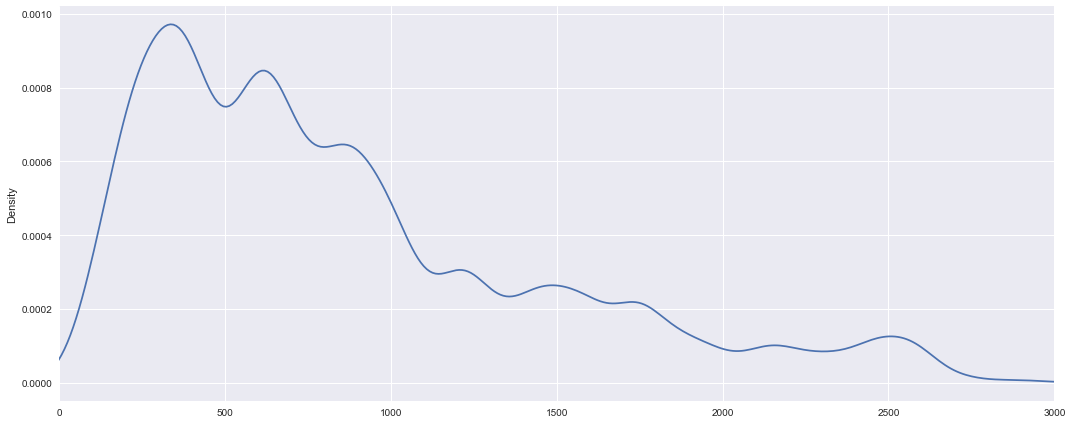

In [23]:
# ploting kde for distance 
plt.figure(figsize=(15,6))
flights['dist'].plot(kind='KDE', xlim=(0,3000))
plt.tight_layout()

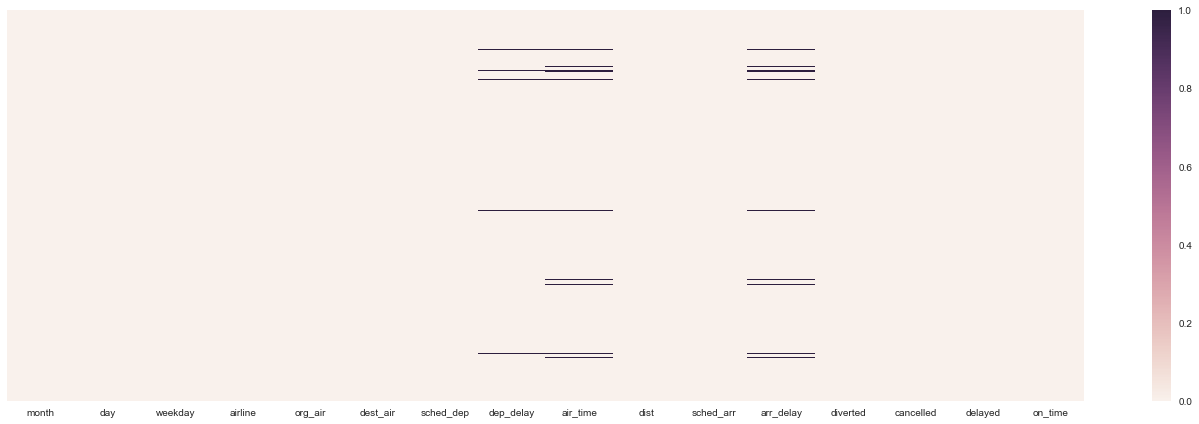

In [37]:
# Plotting the missing values in the dataframe
plt.figure(figsize=(19,6))
sns.heatmap(yticklabels=False, data=flights.isnull())
plt.tight_layout()

## Again plotting everything together

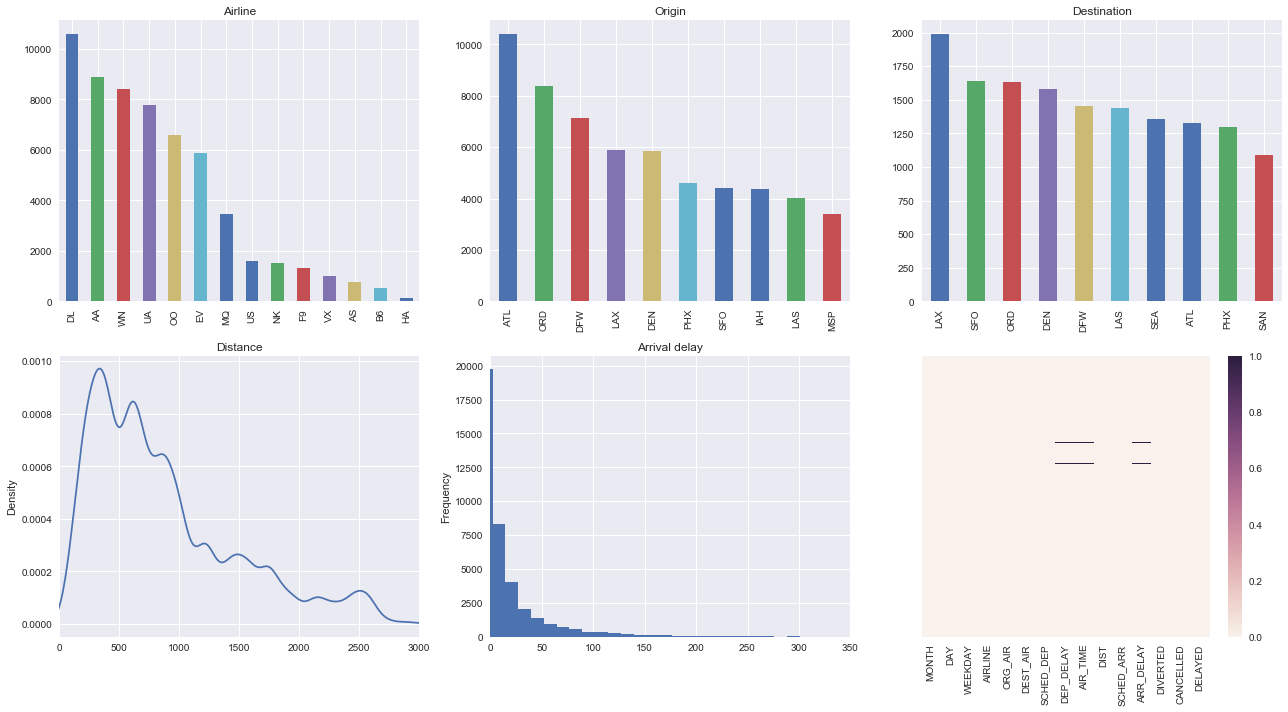

In [132]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
# fig.suptitle('All plots together', size=20)

flights['AIRLINE'].value_counts().plot(kind='bar', ax=axes[0,0], title='Airline')
flights['ORG_AIR'].value_counts().plot(kind='bar', ax=axes[0,1], title='Origin')
flights['DEST_AIR'].value_counts().head(10).plot(kind='bar', ax=axes[0,2], title='Destination')

flights['DIST'].plot(kind='kde', ax=axes[1,0], title='Distance', xlim=(0,3000))
flights['ARR_DELAY'].plot(kind='hist', ax=axes[1,1],xlim=(0,350), title='Arrival delay', bins=100)
sns.heatmap(yticklabels=False, data=flights.isnull(), ax=axes[1,2])

fig.tight_layout()

___
## Making date-time dataframe

In [41]:
flights.head()

,month,day,weekday,airline,org_air,dest_air,sched_dep,dep_delay,air_time,dist,sched_arr,arr_delay,diverted,cancelled,delayed,on_time
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0,1,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0,0,1
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0,1,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0,0,1
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0,1,0


In [40]:
# taking out the hours and minutes of departure 
hour = flights['sched_dep'] // 60
mins = flights['sched_dep'] % 60

In [44]:
df_date = flights[['month', 'day']]

df_date['HOUR'] = hour
df_date['MINUTE'] = mins
df_date['YEAR'] = 2015
df_date.head()

C:\Users\asank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asank\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\asank\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,month,day,HOUR,MINUTE,YEAR
0,1,1,27,5,2015
1,1,1,13,43,2015
2,1,1,21,45,2015
3,1,1,25,55,2015
4,1,1,28,40,2015


## Error reading

The error above is because you are trying to make change to a dataframe which itself is a view of a bigger dataframe. This generates a 3-tier thing that was discussed in the class.

To overcome this error, user the **.copy()** command when making **df_date** dataframe.

In [45]:
df_date = flights[['month', 'day']].copy() # .copy() extra !!

df_date['HOUR'] = hour
df_date['MINUTE'] = mins
df_date['YEAR'] = 2015
df_date.head()

,month,day,HOUR,MINUTE,YEAR
0,1,1,27,5,2015
1,1,1,13,43,2015
2,1,1,21,45,2015
3,1,1,25,55,2015
4,1,1,28,40,2015


### Hurry ! we don't have the warning anymore

In [47]:
# converting the dataframe to pandas datatime object
df_date = pd.to_datetime(df_date)

In [48]:
# updated index with datetime index
flights.set_index(df_date, inplace=True)
flights.head()

,month,day,weekday,airline,org_air,dest_air,sched_dep,dep_delay,air_time,dist,sched_arr,arr_delay,diverted,cancelled,delayed,on_time
2015-01-02 03:05:00,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0,1,0
2015-01-01 13:43:00,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0,0,1
2015-01-01 21:45:00,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0,1,0
2015-01-02 01:55:00,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0,0,1
2015-01-02 04:40:00,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0,1,0


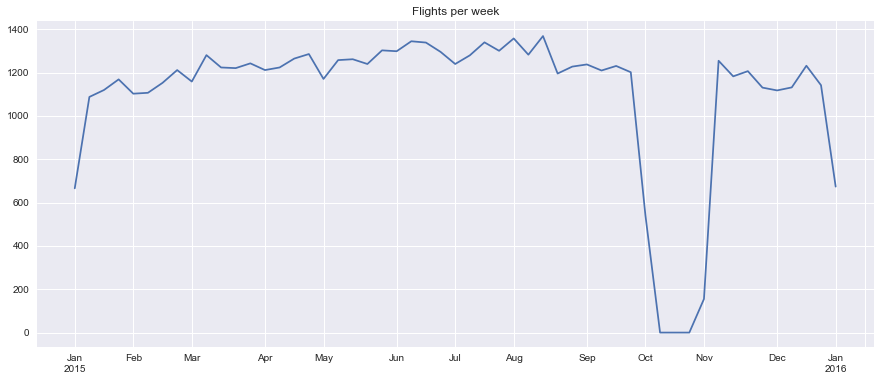

In [138]:
# plot number of flights per week of the year
plt.figure(figsize=(15,6))
flights.resample('W').size().plot(title='Flights per week')

### clearling october month has missing data

Lets try printing number of record for the october month.

In [139]:
flights[flights['MONTH'] == 10]

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED,DELAYED


hey, we don't have record for october month. Thats something that we would have not found out without visualization. Again, visualizations are great to identify outliers and such cases

In [140]:
flights.MONTH.value_counts().sort_index()

1     5003
2     4608
3     5485
4     5326
5     5545
6     5672
7     5754
8     5635
9     5235
11    5098
12    5131
Name: MONTH, dtype: int64

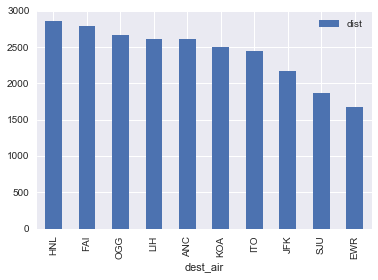

In [50]:
# this plots show which is most famous destination location with highest mean value
flights.groupby('dest_air').agg({'dist':'mean'}).sort_values(by= 'dist', ascending=False).head(10).plot(kind='bar')

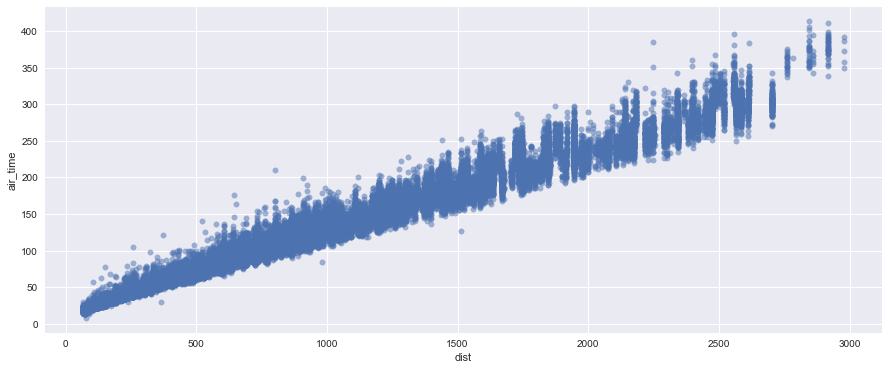

In [51]:
# plot showing linear relation between dist and air_time
flights.query('dist<3000').plot.scatter(x='dist', y= 'air_time',figsize = (15,6), s=30, alpha=0.5)